> # **ASSIGNMENT 2 - SciPy & Scikit-learn**
> #### **DSAI 302 Spring 2024**


Please write your name and student number.

>**Name**: Murat Gün
>
>**Student Number**: 2018107036

The full assignment is worth 100 points in total. Please write your answers within the correct exercise sections. This asssignment consists of two parts. The first part includes tasks using SciPy and the second part has tasks using SciKit Learn


> # **PART 1 - Tasks on SciPy**

## **Task 1 - Analyzing the Association Between Gender and Survival on Titanic (12 points)**

### Background
The Chi-square test is a statistical method used to determine if there is a significant association between categorical variables. It compares the observed frequencies of data to the frequencies that would be expected if there was no association between the variables. The test calculates a statistic called the Chi-square statistic, which is a measure of the difference between the observed and expected frequencies. By comparing this statistic to a critical value or calculating a p-value, it allows researchers to assess the significance of the association. If the p-value is below a certain threshold (commonly 0.05), it indicates that there is a significant association between the variables. This test is widely used in various fields for analyzing data and making inferences about relationships between variables.


In this part your goal is to investigate whether there is a significant association between passenger gender and survival on the Titanic using the Chi-square test.


In [ ]:
from google.colab import  userdata
import os

os.environ["KAGGLE_USERNAME"] = 'muratgn'
os.environ["KAGGLE_KEY"] = '7626ea822b82ec2d50cd03787da5220d'

In [ ]:
! kaggle competitions download 'titanic' -f train.csv

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 40.4MB/s]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Load the Titanic dataset
titanic_df = pd.read_csv('train.csv')

# Handle missing values
titanic_df.dropna(inplace=True)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### Tasks

1. Use the Chi-square test from the scipy.stats module to analyze the relationship between passenger sex and survival.

> a. Create a contingency table to analyze the relationship between the gender and survival.


In [ ]:
contingencyTable = pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])
contingencyTable



Survived,0,1
Sex,,
female,6,82
male,54,41


> b. Compute the Chi-square statistic, p-value, degrees of freedom, and expected frequencies
Here, we use the stats.chi2_contingency function from SciPy to perform the Chi-square test. It returns four values: the Chi-square statistic, the p-value, the degrees of freedom, and the expected frequencies. Hint: give the contingency table you have generated as a parameter to the chi2_contingency() function.

In [ ]:
from scipy.stats import chi2_contingency
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingencyTable)

> c. Print the Chi-square statistic


In [ ]:
print(chi2_stat)

49.62965365707783


> d. Print the p-value

In [ ]:
print(p_value_chi2)

1.8568580662867508e-12


Let's run the following code and interpret the p-value to determine if there is a significant association between passenger sex and survival. Rename p_val if necessary.

In [ ]:
# Check the p-value to determine the significance of the Chi-square test
if p_value_chi2 < 0.05:
    print("The p-value is less than 0.05, indicating strong evidence against the null hypothesis.")
    print("There is significant evidence to reject the null hypothesis that there is no association between sex and survival.")
else:
    print("The p-value is greater than or equal to 0.05, suggesting weak evidence against the null hypothesis.")
    print("There is not enough evidence to reject the null hypothesis that there is no association between sex and survival.")

The p-value is less than 0.05, indicating strong evidence against the null hypothesis.
There is significant evidence to reject the null hypothesis that there is no association between sex and survival.


## **Task 2 - Calculating Water Flow into a Dam (12 points)**

### Problem Statement

In this assignment, you are tasked with analyzing the water flow into a dam. The water flow rate varies sinusoidally with time due to natural variations in river flow. Your goal is to determine the total volume of water that flows into the dam over a certain period. You will use Python and the SciPy library to model the flow rate and calculate the total volume of water.

### Background

The flow rate of water into the dam can be modeled using a sinusoidal function of the form:

f(t) = A*sin(Bt + C) + D

where:
- `t` is the time in hours,
- `A` is the amplitude of the wave, representing the maximum deviation of the flow rate from its average,
- `B` affects the period of the sine wave, representing how quickly the flow rate cycles through its maximum and minimum values,
- `C` affects the phase shift of the cycle, representing the time offset of the maximum flow rate,
- `D` shifts the wave vertically, representing the average flow rate into the dam.

To ensure the flow rate is always positive, we choose `D > A`.


In [ ]:
from scipy.integrate import quad
import numpy as np



### Tasks


1. Define a Python function that models the water flow rate into the dam. Use the following parameters for your model: `A = 1`, `B = 1`, `C = 0`, `D = 2`. This represents a scenario where the flow rate oscillates between 1 and 3 units (with an average of 2 units), with a complete oscillation cycle every `2π` hours.

In [ ]:
import numpy as np
def f(x):
    return np.sin(x)+2

2. Calculate the total volume of water that flows into the dam over a period of one full oscillation cycle (from `t = 0` to `t = 2π` hours). Use the `scipy.integrate.quad` function to perform the integration. Print the total_volume.

In [ ]:
from scipy.integrate import quad
result, error = quad(f, 0, 2*np.pi)

print(f"Total volume of water: {result}")


Total volume of water: 12.566370614359172


## **Task 3 - Profit Maximization (12 points)**

### Problem Statement

You are tasked with maximizing profit for a business that sells a product where the profit depends intricately on the number of units sold. The challenge involves determining the optimal number of units to sell to achieve maximum profit, considering more complex cost and revenue functions.

### Background

The updated cost and revenue functions are given by:

- Cost Function: $C(q) = 20q^3 - 150q^2 + 500q + 2000$
- Revenue Function: $R(q) = -10q^3 + 200q^2 + 100q$

The profit, $P(q)$, is the difference between the total revenue and total cost:

$P(q) = R(q) - C(q)$

### Solution Strategy

Since the `minimize_scalar` function seeks to minimize, we will minimize the negative of the profit function to effectively find its maximum.

### Tasks

In [ ]:
from scipy.optimize import minimize_scalar

1. Formulate the profit function $P(q)$ using the given cost and revenue functions. Hint: a, b, c and d are all has very short codes. They all can be completed in two lines with only return statements in second lines.


> a. Write cost function.
```
def cost(q):
    return ...............
```





In [ ]:
def cost(q):
  return 20*(q**3)-150*(q**2)+500*q+2000


> b. Write revenue function

In [ ]:
def revenue(q):
  return -10*(q**3)+200*(q**2)+100*q

> c. Write profit function. `Use revenue and cost functions you previously defined.`

In [ ]:
def profit(q):
  return revenue(q)-cost(q)

> d. Write objective function for minimization. (negative profit). `Hint: This function should return negative profit. Use previously defined profit function.`

In [ ]:
def objectiveFnc(q):
  return -profit(q)

2. Employ `scipy.optimize.minimize_scalar` to determine the quantity $q$ that maximizes the profit. The maximum number of units this business can sell in a month is 20. So use in the minimize_scalar function specify method='bounded' and specify. bounds=(0, 20) and print it.
    Hint: objective function you have written will be used as a parameter to minimize_scalar function.

In [ ]:
from scipy.optimize import minimize
opt_result = minimize_scalar(objectiveFnc, bounds=(0, 20))
print(opt_result)

 message: Solution found.
 success: True
  status: 0
     fun: -2067.112199493382
       x: 7.156764275200272
     nit: 11
    nfev: 11


3. Compute the optimal quantity to be sold and maximum profit that can be achieved in a month.

> a. Print optimal quantity. `Hint: If you used "opt_result = minimize_scalar(.....)" syntax, then you can access the minimum value with "opt_result.x".`

In [ ]:
print(opt_result.x)

7.156764275200272


> b. Calculate maximum profit that can be achieved. Then display the maximum profit. `Hint: Create a variable named maximum_profit. If you pass the optimal_quantity to profit() function and assign the result to thiss variable you will get the maximum profit.`

In [ ]:
maximum_profit = profit(opt_result.x)
print(maximum_profit, "$")

2067.112199493382 $


## **Task 4 - Optimizing Ingredient Mix (12 points)**

### Problem Statement
As a newly hired data analyst at Sparkling Waters, a company specializing in crafting a range of flavored sparkling water, you are tasked with optimizing the recipe for their latest product, Crystal Clear Sparkle. The beverage is made by blending three key ingredients: Pure Spring Water, Natural Flavor Essence, and Sparkle Extract. The taste profile of Crystal Clear Sparkle is defined by three parameters: Hydration Factor, Flavor Intensity, and Sparkle Factor.

Your goal is to determine the optimal mix of these ingredients that meets the company's taste profile requirements.

### Background

The taste profile of Crystal Clear Sparkle is defined by three parameters: Hydration Factor, Flavor Intensity, and Sparkle Factor. Each ingredient contributes differently to these parameters. The company has determined the exact contribution of each ingredient to the taste profile through extensive market research and taste tests.

### Task

Given the equations representing the contribution of each ingredient to the taste profile, solve for the optimal quantity of each ingredient. The equations are as follows:

### Equations

1. Hydration Factor: $1X + 0.5Y + 0Z = 50$
2. Flavor Intensity: $0.1X + 2Y + 0.5Z = 20$
3. Sparkle Factor: $0X + 0.2Y + 3Z = 30$

Where:
- $X$ is Pure Spring Water,
- $Y$ is Natural Flavor Essence, and
- $Z$ is Sparkle Extract.

The coefficients of X,Y,Z represent their contribution to each taste profile parameter, and the constants (50, 20, 30) are the desired levels of each parameter in the final products.

### Solution Strategy
To find the optimal quantities of X,Y and Z, you will solve the sytem of linear equations Ax=B, where A is the matrix of coefficients, x is the vector variables X,Y,Z and B is the vector representing the taste profile requirements.

In [ ]:
import numpy as np

1. Create coefficient matrix A and taste profile requirements vector B. Also print them. `Use np.array()`

In [ ]:
A = np.array([[1, 0.5, 0], [0.1, 2, 0.5],[0, 0.2, 3]])
B = np.array([50,20,30])
print("Coefficient matrix A:\n", A)
print("Test profile requirements vector B:\n", B)


Coefficient matrix A:
 [[1.  0.5 0. ]
 [0.1 2.  0.5]
 [0.  0.2 3. ]]
Test profile requirements vector B:
 [50 20 30]


2. Solve for x in Ax=B and print x. `Hint: use np.linalg.solve(), the solution is one line.`

In [ ]:
from scipy.linalg import solve
x = solve(A,B)
print("x\n", x)

x
 [47.39130435  5.2173913   9.65217391]


3. Print optimal quantities for pure spring water, natural flavor essence and sparkle extract. `Hint: value are in the x.`

In [ ]:
print("Optimal quantity of Pure Spring Water (X): ", round(x[0],2), "units")
print("Optimal quantity of Natural Flavor Essence (Y): ", round(x[1],2), "units")
print("Optimal quantity of Sparkle Extract (Z): ", round(x[2],2), "units")

Optimal quantity of Pure Spring Water (X):  47.39 units
Optimal quantity of Natural Flavor Essence (Y):  5.22 units
Optimal quantity of Sparkle Extract (Z):  9.65 units


> # **PART 2 - Tasks on scikit-learn**

## Task 1 - Regression ( 20 points)

### Background

Remember the 'Sleep Efficiency' dataset that you worked on in the previous assignment. In this assignment, you will be asked to apply some machine learning techniques on this dataset. Start with loading data and importing necessary libraries as always.

In [ ]:
from google.colab import  userdata
import os

os.environ["KAGGLE_USERNAME"] = 'muratgn'
os.environ["KAGGLE_KEY"] = '7626ea822b82ec2d50cd03787da5220d'

! kaggle datasets download equilibriumm/sleep-efficiency -f Sleep_Efficiency.csv

  0% 0.00/40.4k [00:00<?, ?B/s]
100% 40.4k/40.4k [00:00<00:00, 36.6MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import norm

In [ ]:
df2 = pd.read_csv('/content/Sleep_Efficiency.csv')

We filled the missing values.

In [ ]:
# Fill 'Caffeine consumption' and 'Alcohol consumption' missing values with .mode()
df2['Caffeine consumption'].fillna(df2['Caffeine consumption'].mode()[0], inplace=True)
df2['Alcohol consumption'].fillna(df2['Alcohol consumption'].mode()[0], inplace=True)

np.random.seed(302)
# Fill other columns with missing values randomly.It fills those missing values with a random choice from the unique non-null values in that column.
for column in ['Awakenings', 'Exercise frequency']:
    if df2[column].isnull().any():
        df2[column].fillna(np.random.choice(df2[column].dropna().unique()), inplace=True)

df2.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


We defined age groups and get a subset of 'Adult' group to work on it.

In [ ]:
# Define the age groups and corresponding labels
age_bins = [0, 14, 24, 64, float('inf')]
age_labels = ['Child', 'Youth', 'Adult', 'Senior']

# Create a new column 'Age group' based on the age groups defined
df2['Age group'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels, right=True) #right=False if the upper bounds are exclusive.

# Create a subset to get adults only
df_adult = df2[df2['Age group'] == 'Adult'].copy()

df_adult.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age group
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,Adult
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,Adult
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,Adult
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,0.0,0.0,No,1.0,Adult
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0,Adult


### Tasks

1. (3 Points) In order to use the information from object columns for machine learning, we should modify them first. Encode the 'Gender' and 'Smoking status' columns. (1 for Male, 0 for Female & 1 for Smoking Status = Yes, 0 for Smoking Status = No)

    Then drop the following columns: ['Age group', 'ID', 'Bedtime', 'Wakeup time', 'Gender', 'Smoking status']

In [ ]:
df_adult['Male'] = (df_adult['Gender'] == 'Male').astype(int)
df_adult['Smoking'] = (df_adult['Smoking status'] == 'Yes').astype(int)
df_adult.head()


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Age group,Male,Smoking
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,Adult,0,0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,Adult,0,1
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,Adult,1,0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,0.0,0.0,No,1.0,Adult,0,0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0,Adult,0,1


In [ ]:
dropColumns =  ['Age group', 'ID', 'Bedtime', 'Wakeup time', 'Gender', 'Smoking status']
df_adult = df_adult.drop(columns = dropColumns)
df_adult.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Male,Smoking
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,0,0
3,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0,1
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0
5,36,7.5,0.90,23,60,17,0.0,0.0,0.0,1.0,0,0
6,27,6.0,0.54,28,25,47,2.0,50.0,0.0,1.0,0,1


2. (3 Points) Now you will try to predict 'Sleep efficiency' by using the information coming from the following columns: ['Age', 'Sleep duration', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'male', 'smoking']

    *Solution Strategy*

    Since Sleep Efficiency is a continuous variable, you will use Linear Regression as a prediction model.

    First, create your X and y objects as defined above and split the data (as X_train, X_test, y_train, y_test) with the random state 302 which is the code of this course.

In [ ]:
X = df_adult[['Age', 'Sleep duration', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'Male', 'Smoking']]  # Features
y = df_adult['Sleep efficiency']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=302)

In [ ]:
X_val

,Age,Sleep duration,Caffeine consumption,Alcohol consumption,Exercise frequency,Male,Smoking
416,49,7.0,0.0,0.0,5.0,0,0
238,37,8.5,25.0,1.0,0.0,0,0
29,47,7.0,0.0,3.0,4.0,0,0
140,37,8.5,25.0,0.0,0.0,0,1
371,32,7.0,50.0,2.0,1.0,0,1
...,...,...,...,...,...,...,...
49,37,7.0,0.0,5.0,4.0,0,0
114,32,8.5,0.0,0.0,1.0,1,1
139,52,9.0,25.0,2.0,0.0,0,0
229,26,7.0,0.0,0.0,3.0,1,0


3. (4 Points) Scale X_train and X_test using MinMaxScaler().

 Keep in mind that you should use fit_transform() method on our training data and transform() method on our test data. This is because we should scale the test data according to the min and max values of the training data in order to prevent any data leakage. This is one of the main principles in machine learning: While modelling, do not use any kind of information from the test data, even in scaling.

    *Further Reading*

    For more comprehensive information: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_trainNormalized = min_max_scaler.fit_transform(X_train)
X_valNormalized = min_max_scaler.transform(X_val)

4. (3 Points) Apply Linear Regression. Print the model coefficients, intercept and the score.

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_train)

print(f"Coefficients: {linear_reg.coef_}")
print(f"Intercept: {linear_reg.intercept_}")
score = linear_reg.score(X_val, y_val)
print(f"Model score with all features: {score}")


Coefficients: [ 1.56715707e-04  5.05040325e-05 -5.22775329e-06 -3.25784907e-02
  1.57408915e-02 -6.49024593e-03 -8.19488560e-02]
Intercept: 0.8350635288986975
Model score with all features: 0.3238242722580077


5. (3 Points) Calculate Mean Absolute Error, Mean Squared Error and R2 Score.

    (You can get the libraries with: from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

mae = mean_absolute_error(y_train, y_pred_train)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_train, y_pred_train)
print(f'R-squared Score: {r2:.2f}')


Mean Absolute Error: 0.09
Mean Squared Error: 0.01
R-squared Score: 0.29


6. (4 Points) Sometimes, models tend to overfit which result in a lower performance in a test set. Ridge Regression and Lasso Regression are regularization techniques used to prevent this issue in linear regression models by adding a penalty term to the loss function.

    However, overfitting is not normally expected for such a simple model trained with a dataset composed of a relatively low number of features. One way to check for model fitting in linear regression is to calculate the R-squared values separately for the train and test datasets, then compare them. In principle, achieving a high R-squared value in the training set but a significantly lower R-squared value in the test set is indicative of overfitting in the model, meaning that the model lacks generalizability and may perform poorly on unseen test data.

    For this purpose, calculate the Training R-squared vs Test R-squared values and apply Ridge and Lasso Regularization methods if necessary, especially if you conclude that the model overfits.

    *Further Watching*

    To understand the principle behind these regularization techniques, you can watch the following videos:

    https://www.youtube.com/watch?v=Q81RR3yKn30

    https://www.youtube.com/watch?v=NGf0voTMlcs


In [ ]:
y_pred_train = model.predict(X_trainNormalized)
y_pred_val = model.predict(X_valNormalized)

r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

print(f"R-squared for train: {r2_train:.2f}")
print(f"R-squared for test: {r2_val:.2f}")


R-squared for train: 0.16
R-squared for test: 0.17


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Task 2 - Classification ( 20 points)

### Background

In this section you will use some classification methods with the same dataset. For a classification modelling, we need a categorical feature for prediction rather than continuous as Sleep Efficiency. For this purpose, you will convert a continuous variable to a categorical variable.

1. (2 Points) By using bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1.0] and pd.cut function, create a categorical feature ranges from 0 to 4 for 'Sleep efficiency' column (Leave the "right" argument as default).

In [ ]:
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
df_adult['Sleep efficiency categorical'] = pd.cut(df_adult['Sleep efficiency'], bins=bin_edges, labels=['0', '1', '2', '3', '4'])


2. (5 Points) Create X and y objects as in the following:

    X2 = df[['Age', 'Sleep duration', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'male', 'smoking']]

    y2 = df['Sleep efficiency']

    Then split the data and scale them with MinMaxScaler().

In [ ]:
X2 = df_adult[['Age', 'Sleep duration', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'Male', 'Smoking']]

y2 = df_adult['Sleep efficiency categorical']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. (4 Points) Now, apply a bunch of classification methods (LogisticRegression, KNN, Decision Tree, Random Forest, SVM and Gradient Boosting) and print accuracy values for each.

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")




Logistic Regression Accuracy: 0.7013
KNN Accuracy: 0.6364
Decision Tree Accuracy: 0.5714
Random Forest Accuracy: 0.6364
SVM Accuracy: 0.7013
Gradient Boosting Accuracy: 0.6494


4. (6 Points) Now use any Hyperparameter Tuning method you have learned in the class to improve the performance of Random Forest. Print the best score and corresponding best paremeters. Then evaluate this model on the test data and print accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

rf_classifier = RandomForestClassifier(random_state=302)
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=parameters, n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.717049180327869
Test Accuracy: 0.6883116883116883


*With these strategies, you will get an accuracy score around 0.7 which indicates that the model is not successful. Remember, in this example we created the classes artificially just for practice for classification. This implementation of creating equal ranged bins may not be a good strategy as you might expect.*

5. (3 Points) Generate Feature Importance Plot for the best model.

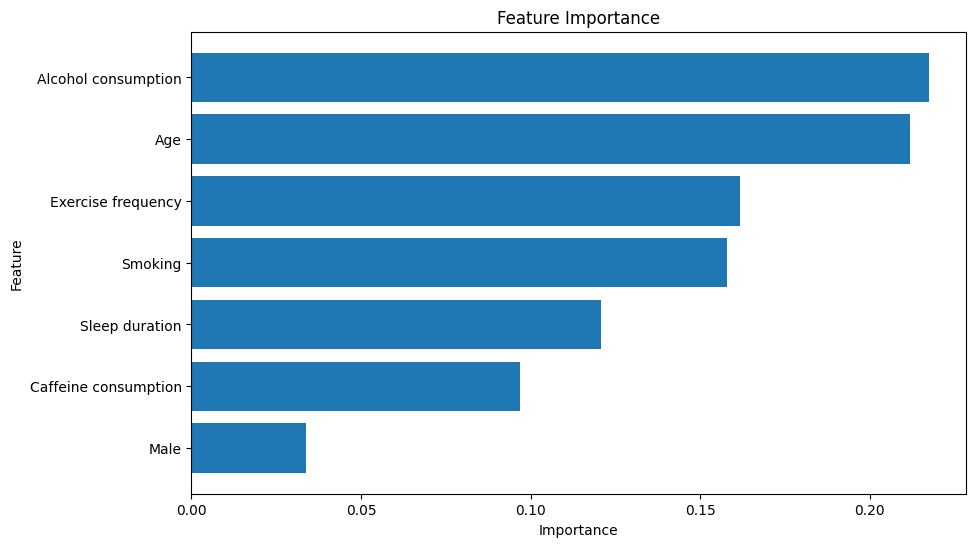

In [ ]:
importances = rf_classifier_best.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), importances[indices], align='center')
plt.yticks(range(X_test.shape[1]), X_test.columns[indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# I got most of these codes from the internet in that part directly.



## Task 3 - Clustering ( 10 points)  

This task will be a clustering application on Sleep Efficiency dataset.

Load the data, libraries and perform the necessary preprocessing steps on the dataset, including handling missing values and scaling numerical features. Code for this part is given. Run the following code.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df3 = pd.read_csv('/content/Sleep_Efficiency.csv')

numeric_features = ['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

# Preprocessing steps for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Assuming no categorical features are included in this example
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

X_preprocessed = preprocessor.fit_transform(df3)

1. (3 Points) KMeans Clustering:

Apply the KMeans clustering algorithm to the preprocessed data (X_preprocessed). Choose cluster count as 3 (k=3). Use random state 42. (You are not expected to plot anything in this question.)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_preprocessed)
labels = kmeans.predict(X_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2. (3 Points) Dimensionality Reduction with PCA:

Use PCA to reduce the dataset to two principal components for visualization purposes.

In [ ]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_preprocessed_pca = pca.fit_transform(X_preprocessed)




3. ( 4 Points) Visualization:
Create a scatter plot of the two principal components.
Color-code the points based on their cluster assignment from KMeans.
Add a legend to the plot that indicates the cluster numbers.
Ensure your plot includes a title, and labels for the x and y axes. Also show clusters centers. `Hint: kmeans.cluster_centers_ gives cluster centers but since these centers are in the original feature space, to plot them on the same PCA-reduced scatter plot, you may need to use something like cluster_centers_pca = pca.transform(kmeans.cluster_centers_).`



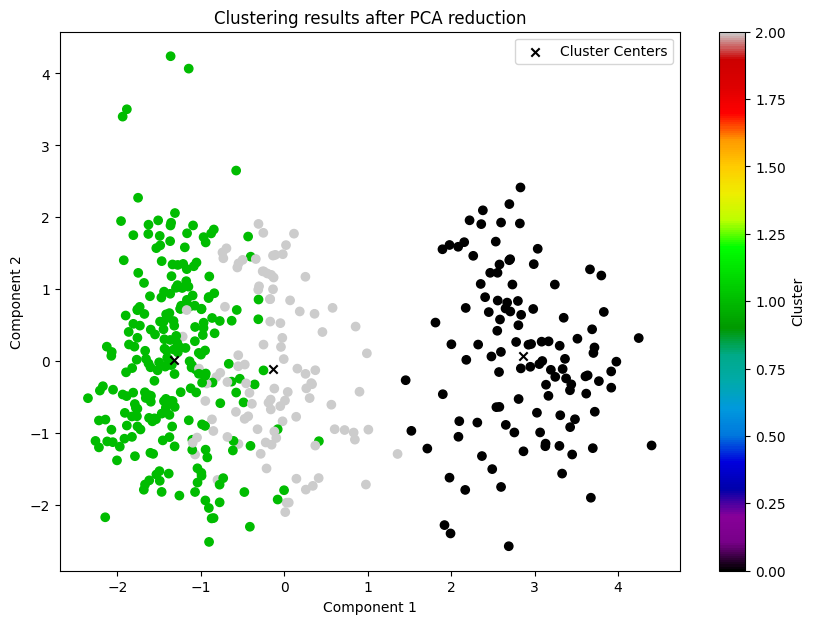

In [ ]:
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_preprocessed_pca[:, 0], X_preprocessed_pca[:, 1], c=labels, cmap='nipy_spectral')
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='black', marker='x', label='Cluster Centers')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster')
plt.title('Clustering results after PCA reduction')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.nipy_spectral(i/len(unique_labels)), markersize=10, label=f'Cluster {i+1}') for i in unique_labels]
plt.legend()
plt.show()


